# EDA and Modeling for KDD Project 

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#reading in our data
df=pd.read_csv('https://raw.githubusercontent.com/jackphillips96/Data/master/Covid.csv', index_col=0)

In [ ]:
#understanding data
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,location,Code,Date,Stay at home requirements (OxBSG),continent,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Afghanistan,AFG,2020-01-01,0,Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,Afghanistan,AFG,2020-01-02,0,Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,Afghanistan,AFG,2020-01-03,0,Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,Afghanistan,AFG,2020-01-04,0,Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,Afghanistan,AFG,2020-01-05,0,Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
#checking out dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 26902
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   location                           26903 non-null  object        
 1   Code                               26903 non-null  object        
 2   Date                               26903 non-null  datetime64[ns]
 3   Stay at home requirements (OxBSG)  26903 non-null  int64         
 4   continent                          26903 non-null  object        
 5   total_cases                        26610 non-null  float64       
 6   new_cases                          26610 non-null  float64       
 7   total_deaths                       26610 non-null  float64       
 8   new_deaths                         26610 non-null  float64       
 9   total_cases_per_million            26610 non-null  float64       
 10  new_cases_per_million             

In [ ]:
#creating a correlation matrix
df.corr()

,Stay at home requirements (OxBSG),total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
Stay at home requirements (OxBSG),1.000000,0.109968,0.140382,0.084593,0.139015,0.044214,0.143475,0.011139,0.105709,0.092392,0.137261,-0.191921,-0.084235,0.133349,-0.087537,0.784231,0.106434,-0.016037,-0.193885,-0.194098,-0.200903,-0.225257,0.089985,0.108239,0.065857,-0.139470,0.026002,0.060664,-0.139661,-0.142195
total_cases,0.109968,1.000000,0.887114,0.912552,0.601203,0.261460,0.210004,0.266479,0.129584,0.916596,0.931499,0.126195,0.113811,0.897232,0.115691,0.069838,0.187239,-0.017073,0.094975,0.089228,0.086183,0.096969,-0.082077,-0.077872,0.049562,0.077575,-0.046148,0.065732,0.004466,0.081695
new_cases,0.140382,0.887114,1.000000,0.755666,0.730159,0.198373,0.283571,0.164528,0.169771,0.786074,0.865872,0.052932,0.075302,0.823647,0.071382,0.094667,0.220654,-0.018093,0.059960,0.046986,0.041745,0.065710,-0.069381,-0.061295,0.058905,0.042856,-0.062108,0.058658,-0.021820,0.052268
total_deaths,0.084593,0.912552,0.755666,1.000000,0.621979,0.240478,0.153594,0.420627,0.163108,0.804472,0.823066,0.110091,0.098557,0.800846,0.102717,0.064982,0.151405,-0.024610,0.145535,0.163929,0.165081,0.120391,-0.098950,-0.140004,0.009195,0.132710,-0.074490,0.103345,0.004855,0.131895
new_deaths,0.139015,0.601203,0.730159,0.621979,1.000000,0.141767,0.204158,0.207011,0.346274,0.407364,0.545895,-0.016895,0.025062,0.520159,0.019286,0.101370,0.169283,-0.025560,0.098937,0.104509,0.103013,0.079685,-0.088096,-0.111271,0.029346,0.084542,-0.081218,0.103257,-0.018926,0.094800
total_cases_per_million,0.044214,0.261460,0.198373,0.240478,0.141767,1.000000,0.568845,0.621776,0.202777,0.212144,0.178759,0.534614,0.389818,0.177076,0.429738,0.092196,-0.050966,0.100251,0.174281,0.082992,0.084316,0.396390,-0.205693,-0.201410,0.099187,0.115672,-0.065887,0.202464,0.020632,0.263240
new_cases_per_million,0.143475,0.210004,0.283571,0.153594,0.204158,0.568845,1.000000,0.221010,0.333725,0.132037,0.139145,0.279423,0.296371,0.132231,0.324847,0.167512,-0.036364,0.074638,0.087449,-0.013637,-0.012707,0.280509,-0.139360,-0.134085,0.131298,0.022001,-0.058606,0.153264,-0.019065,0.167299
total_deaths_per_million,0.011139,0.266479,0.164528,0.420627,0.207011,0.621776,0.221010,1.000000,0.284701,0.301587,0.262804,0.249116,0.182971,0.258085,0.185546,0.050681,-0.026743,0.007718,0.279597,0.320034,0.329573,0.256360,-0.172084,-0.268904,-0.085103,0.308005,-0.082873,0.194929,0.065161,0.293861
new_deaths_per_million,0.105709,0.129584,0.169771,0.163108,0.346274,0.202777,0.333725,0.284701,1.000000,0.083185,0.129493,-0.007688,0.050964,0.119438,0.046326,0.111425,-0.011201,-0.006311,0.153704,0.168409,0.172757,0.115770,-0.126465,-0.162397,-0.032407,0.167028,-0.061562,0.105245,0.018832,0.148508
total_tests,0.092392,0.916596,0.786074,0.804472,0.407364,0.212144,0.132037,0.301587,0.083185,1.000000,0.947397,0.236007,0.179348,0.959441,0.197370,0.030899,0.284139,-0.028004,0.078685,0.064206,0.062454,0.110530,-0.067604,0.022914,0.087927,0.070665,0.031599,0.033199,0.023931,0.030124


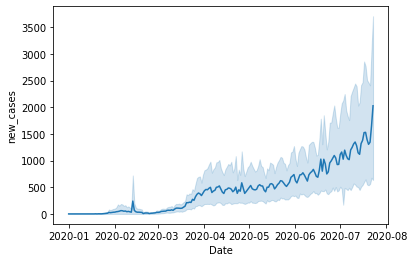

In [ ]:
#taking a look at new cases over time
plt.figure()
sns.lineplot('Date','new_cases',data=df)
plt.show()

In [ ]:
#distribution of stay at home order levels
grouped=df.groupby('Stay at home requirements (OxBSG)').size()
print(grouped)

Stay at home requirements (OxBSG)
0    9770
1    6518
2    8538
3    2077
dtype: int64


In [ ]:
#italy stay at home orders
italy=df[df['location']=='Italy']
grouped=italy.groupby('Stay at home requirements (OxBSG)').size()
print(grouped)

Stay at home requirements (OxBSG)
0    53
1    81
2    50
3    21
dtype: int64


# Arma Model

In [ ]:
#ARMA MODEL 
!pip install git+https://github.com/RJT1990/pyflux

  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-8p9dbn3n
  Running command git clone -q https://github.com/RJT1990/pyflux /tmp/pip-req-build-8p9dbn3n
     |████████████████████████████████| 962kB 2.6MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.17-cp36-cp36m-linux_x86_64.whl size=5331573 sha256=792dfbdbe542f74157ccef318805659e9cf40425e97bb55014a030e92f6940fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-ctz9crm1/wheels/e3/32/60/635f09bc86f7163ce989cb1158ddbbc044f310333c24788004
Successfully built pyflux


In [ ]:
#importing necessary packages
import pyflux as pf
from datetime import datetime

%matplotlib inline

In [ ]:
#unique countries
df['location'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Azerbaijan', 'Bangladesh', 'Belgium', 'Benin', 'Bolivia',
       'Brazil', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Chad', 'Chile', 'China', 'Colombia', "Cote d'Ivoire",
       'Cuba', 'Czech Republic', 'Democratic Republic of Congo',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Ethiopia', 'France',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Madagascar', 'Malawi', 'Malaysia', 'Mali',
       'Mexico', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal',
       'Netherlands', 'Niger', 'Nigeria', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Rwanda',
       'Saudi Arabia', 'Senegal', 'Somalia', 'South Africa',
       'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan',
       'Sweden', 'Syria', 'Taiwan', 'Tanzania

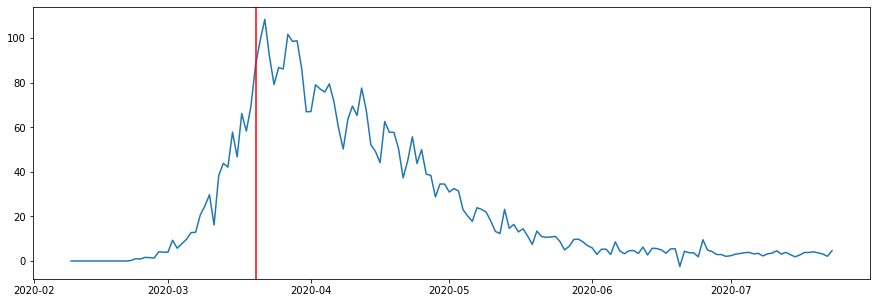

In [ ]:
# Arma Model with our data for italy

df2=df[df['location']=='Italy']
df2=df2[df2['Date']>'2020-02-08']
df2.index = df2['Date'];
df2.loc[(df2['Date']>='2020-03-20'), 'stay_3'] = 1;
df2.loc[(df2['Date']<'2020-03-20'), 'stay_3'] = 0;

plt.figure(figsize=(15,5));
plt.plot(df2.index,df2['new_cases_per_million']);
plt.ylabel('');
plt.title('');
plt.axvline(dt.datetime(2020, 3, 20),c='red')
plt.plot();

In [ ]:
#italy model 
model = pf.ARIMAX(data=df2, formula='new_cases_per_million~1+stay_3',
                  ar=1, ma=1, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: new_cases_per_million               Method: MLE                                       
Start Date: 2020-03-10 00:00:00                         Log Likelihood: -452.0714                         
End Date: 2020-07-23 00:00:00                           AIC: 914.1428                                     
Number of observations: 136                             BIC: 928.7061                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9804     0.0153     64.1452  0.0      (0.9504 | 1.0103)        
MA(1)                                

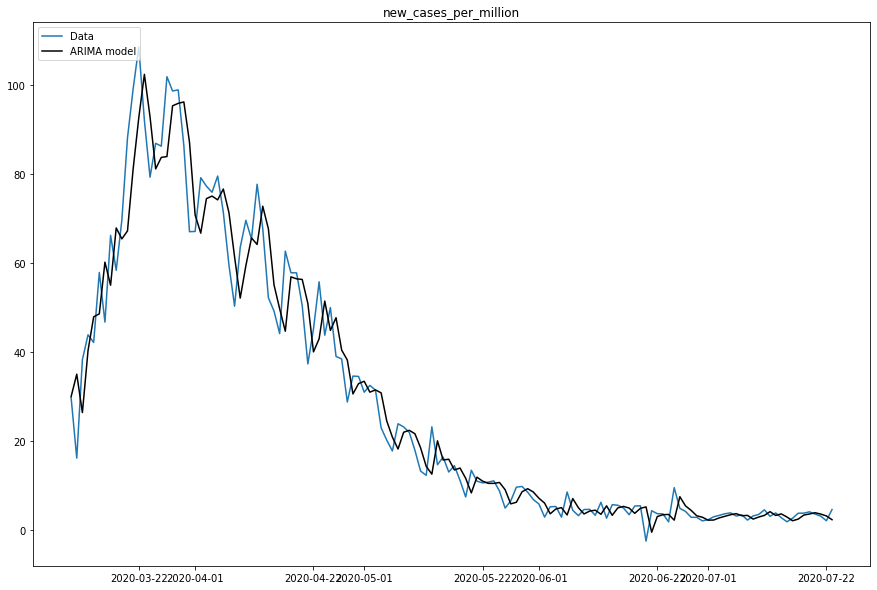

In [ ]:
#italy model fit plot
model.plot_fit(figsize=(15,10))

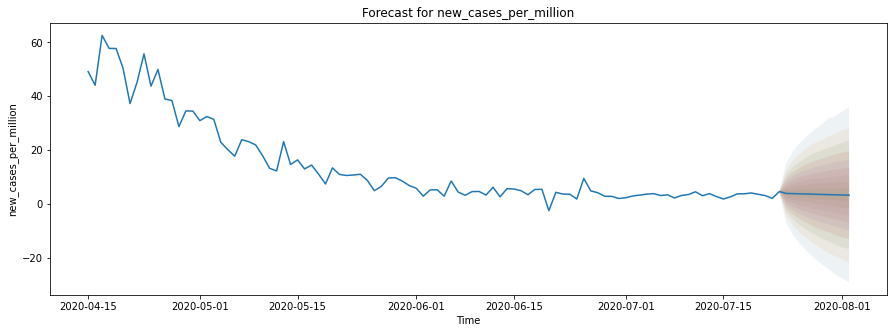

In [ ]:
#italy predictions plot
model.plot_predict(h=10, oos_data=df2.iloc[-50:], past_values=100, figsize=(15,5))

Casual Analysis - https://github.com/jamalsenouci/causalimpact/blob/master/GettingStarted.ipynb

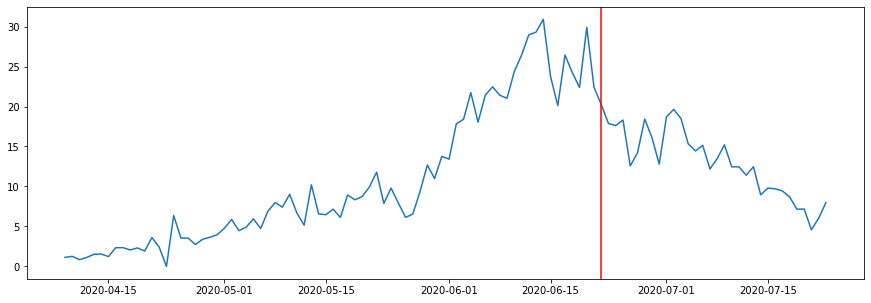

In [ ]:
#pakistan eda and data prep
df3=df[df['location']=='Pakistan']
df3=df3[df3['Date']>'2020-04-08']
df3.index = df3['Date'];
df3.loc[(df3['Date']>='2020-06-22'), 'stay_3'] = 1;
df3.loc[(df3['Date']<'2020-06-22'), 'stay_3'] = 0;


plt.figure(figsize=(15,5));
plt.plot(df3.index,df3['new_cases_per_million']);
plt.ylabel('');
plt.title('');
plt.axvline(dt.datetime(2020, 6, 22),c='red')
plt.plot();

In [ ]:
df3[df3['Date']>'2020-06-01'].head(50)

,location,Code,Date,Stay at home requirements (OxBSG),continent,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,stay_3
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-02,Pakistan,PAK,2020-06-02,2,Asia,76398.0,3938.0,1621.0,78.0,345.861,17.828,7.338,0.353,577974.0,16838.0,2.617,0.076,12438.0,0.056,tests performed,82.41,220892331,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.0
2020-06-03,Pakistan,PAK,2020-06-03,2,Asia,80463.0,4065.0,1688.0,67.0,364.263,18.403,7.642,0.303,595344.0,17370.0,2.695,0.079,13706.0,0.062,tests performed,82.41,220892331,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.0
2020-06-04,Pakistan,PAK,2020-06-04,1,Asia,85264.0,4801.0,1770.0,82.0,385.998,21.735,8.013,0.371,615511.0,20167.0,2.786,0.091,15346.0,0.069,tests performed,69.44,220892331,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.0
2020-06-05,Pakistan,PAK,2020-06-05,1,Asia,89249.0,3985.0,1838.0,68.0,404.038,18.040,8.321,0.308,638323.0,22812.0,2.890,0.103,16901.0,0.077,tests performed,69.44,220892331,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.0
2020-06-06,Pakistan,PAK,2020-06-06,1,Asia,93983.0,4734.0,1935.0,97.0,425.470,21.431,8.760,0.439,660508.0,22185.0,2.990,0.100,18353.0,0.083,tests performed,69.44,220892331,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.0
2020-06-07,Pakistan,PAK,2020-06-07,1,Asia,98943.0,4960.0,2002.0,67.0,447.924,22.454,9.063,0.303,683608.0,23100.0,3.095,0.105,19511.0,0.088,tests performed,61.11,220892331,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.0
2020-06-08,Pakistan,PAK,2020-06-08,1,Asia,103671.0,4728.0,2067.0,65.0,469.328,21.404,9.358,0.294,705833.0,22225.0,3.195,0.101,20671.0,0.094,tests performed,61.11,220892331,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.0
2020-06-09,Pakistan,PAK,2020-06-09,1,Asia,108317.0,4646.0,2172.0,105.0,490.361,21.033,9.833,0.475,730453.0,24620.0,3.307,0.111,21783.0,0.099,tests performed,61.11,220892331,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.0
2020-06-10,Pakistan,PAK,2020-06-10,1,Asia,113702.0,5385.0,2255.0,83.0,514.739,24.378,10.209,0.376,754252.0,23799.0,3.415,0.108,22701.0,0.103,tests performed,61.11,220892331,255.573,23.5,4.495,2.78,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.6,67.27,0.0


In [ ]:
#pakistan model
model = pf.ARIMAX(data=df3, formula='new_cases_per_million~1+stay_3',
                  ar=1, ma=1, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: new_cases_per_million               Method: MLE                                       
Start Date: 2020-04-10 00:00:00                         Log Likelihood: -237.6498                         
End Date: 2020-07-23 00:00:00                           AIC: 485.2995                                     
Number of observations: 105                             BIC: 498.5693                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9854     0.0185     53.3392  0.0      (0.9492 | 1.0216)        
MA(1)                                

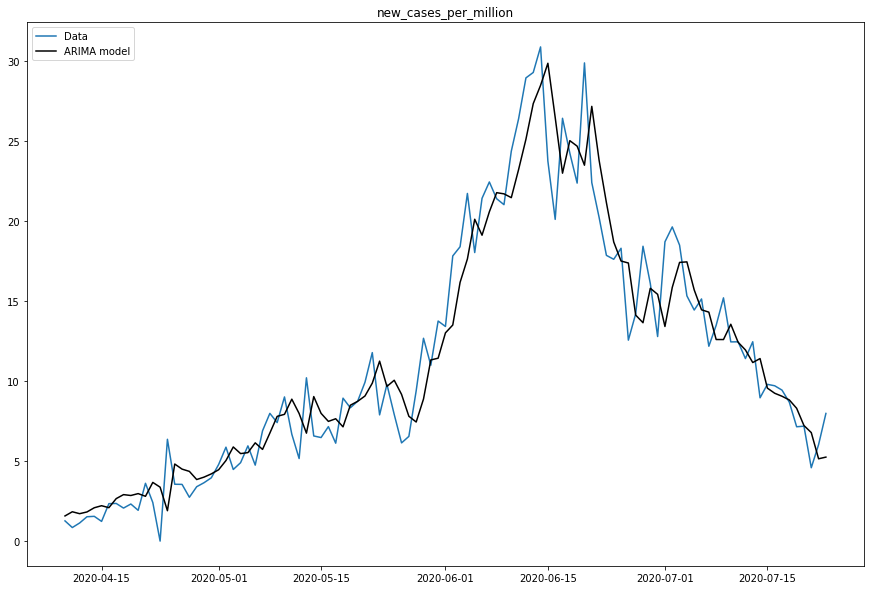

In [ ]:
#model fit plot
model.plot_fit(figsize=(15,10))

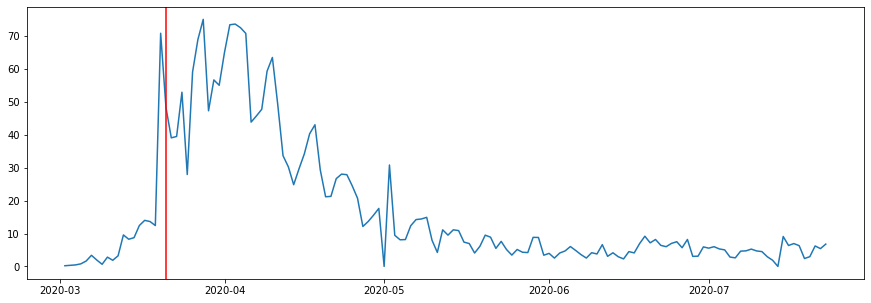

In [ ]:

#germany eda and data prep

df4=df[df['location']=='Germany']
df4.loc[(df4['Date']>='2020-03-21'), 'stay_3'] = 1;
df4.loc[(df4['Date']<'2020-03-21'), 'stay_3'] = 0;

df4=df4[df4['Date']>'2020-03-01']
df4.index = df4['Date'];
plt.figure(figsize=(15,5));
plt.plot(df4.index,df4['new_cases_per_million']);
plt.ylabel('');
plt.title('');
plt.axvline(dt.datetime(2020, 3, 21),c='red')
plt.plot();


In [ ]:
#finding when stay at home orders increased
df4[df4['Date']>'2020-03-01'].head(50)

,location,Code,Date,Stay at home requirements (OxBSG),continent,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,stay_3
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-02,Germany,DEU,2020-03-02,0,Europe,129.0,18.0,0.0,0.0,1.540,0.215,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,83783945,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.0
2020-03-03,Germany,DEU,2020-03-03,0,Europe,157.0,28.0,0.0,0.0,1.874,0.334,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,83783945,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.0
2020-03-04,Germany,DEU,2020-03-04,0,Europe,196.0,39.0,0.0,0.0,2.339,0.465,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,83783945,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.0
2020-03-05,Germany,DEU,2020-03-05,0,Europe,262.0,66.0,0.0,0.0,3.127,0.788,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,83783945,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.0
2020-03-06,Germany,DEU,2020-03-06,0,Europe,400.0,138.0,0.0,0.0,4.774,1.647,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,83783945,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.0
2020-03-07,Germany,DEU,2020-03-07,0,Europe,684.0,284.0,0.0,0.0,8.164,3.390,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,83783945,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.0
2020-03-08,Germany,DEU,2020-03-08,0,Europe,847.0,163.0,0.0,0.0,10.109,1.945,0.000,0.000,124716.0,NaN,1.489,NaN,NaN,NaN,tests performed,25.00,83783945,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.0
2020-03-09,Germany,DEU,2020-03-09,1,Europe,902.0,55.0,0.0,0.0,10.766,0.656,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,28.70,83783945,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.0
2020-03-10,Germany,DEU,2020-03-10,1,Europe,1139.0,237.0,2.0,2.0,13.594,2.829,0.024,0.024,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,32.87,83783945,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.0


In [ ]:
#germany model
model = pf.ARIMAX(data=df4, formula='new_cases_per_million~1+stay_3',
                  ar=1, ma=1, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: new_cases_per_million               Method: MLE                                       
Start Date: 2020-03-03 00:00:00                         Log Likelihood: -501.7833                         
End Date: 2020-07-23 00:00:00                           AIC: 1013.5665                                    
Number of observations: 143                             BIC: 1028.3807                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9802     0.0214     45.7455  0.0      (0.9382 | 1.0222)        
MA(1)                                

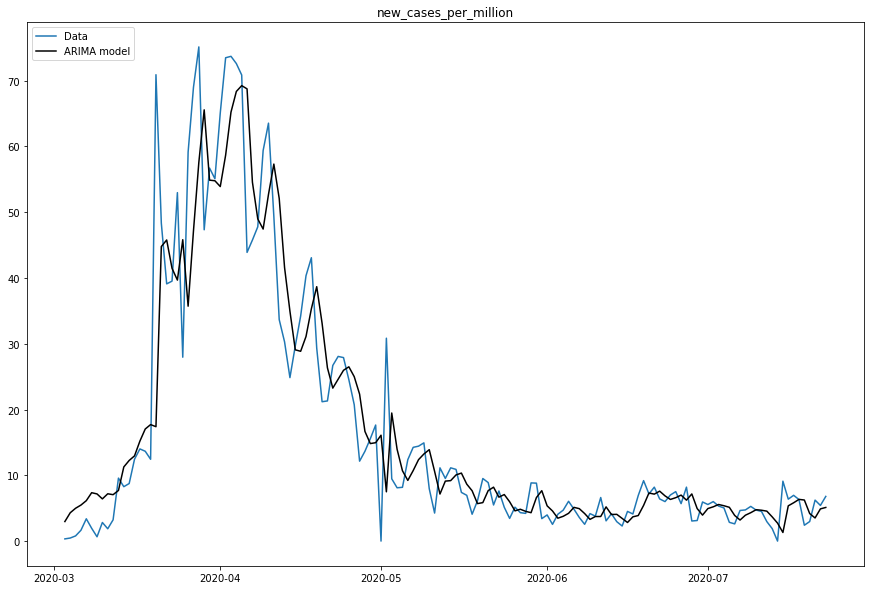

In [ ]:
#germany model fit plot
model.plot_fit(figsize=(15,10))